![Alura <](img/logo-alura.svg)
<br><br>
    
## Estatística com Python parte 1: Frequências e Medidas

- Nível: Básico 
- Aluno: Paulo Freitas Nobrega 
- Professor: Rodrigo Fernando Dias 
- Link do curso: https://cursos.alura.com.br/course/estatistica-distribuicoes-e-medidas
<br><br>

##### Dataset: Pesquisa Nacional por Amostra de Domicílios (PNAD) 2015
> O sistema de pesquisas domiciliares, implantado progressivamente no Brasil a partir de 1967, com a criação da **Pesquisa Nacional por Amostra de Domicílios - PNAD**, produz informações básicas para o estudo do desenvolvimento socioeconômico do País.

##### Dataset: Boletins
> Pequeno conjunto de dados para auxiliar a aula. Contitui-se de variáveis do tipo quantitativa (numérica) contínua.

<br>

### Aula 05: Medidas de Dispersão
A `variabilidade`, também chamada de `dispersão`, mede se os valores de dados estão compactados ou espalhados. A variabilidade fica no centro da estatística: medindo, reduzindo, distinguindo variabilidade aleatório de real, indentificando as diversas fontes de variabilidade real e tomando decisões em sua presença.

---
BRUCE, Peter. **Estatística Prática para Cientistas de Dados**: 50 Conceitos Essenciais. 1. ed. p. 14. Rio de Janeiro: Alta Books, 2019.

### Fórmulas e conceitos estatísticos para esta aula.

Outliers: Valor que seja muito distante dos valores em um conjunto de dados.

$n$ = Número de elementos da amostra/população

Média Populacional: $\mu=\frac{\sum_{i=1}^N x_i}{N}$

Média Amostral: $\bar x=\frac{\sum_{i=1}^n x_i}{n}$

Desvio Médio Absoluto: $DM=\frac{\sum_{i=1}^n |x_i - \bar x|}{n}$

Variância Populacional: $\sigma^2=\frac{\sum_{i=1}^n (x_i - \mu)^2}{n}$

Variância Amostral: $S^2=\frac{\sum_{i=1}^n (x_i - \bar x)^2}{n-1}$

Desvio Padrão Populacional: $\sigma=\sqrt{\frac{\sum_{i=1}^n (x_i - \mu)^2}{n}} \Rightarrow \sqrt{\sigma^2}$

Desvio Padrão Amostral: $S=\sqrt{\frac{\sum_{i=1}^n (x_i - \bar x)^2}{n-1}} \Rightarrow \sqrt{S^2}$

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as misc
import matplotlib.pyplot as plt

# Aplicando Estilo Matplotlib
plt.style.use('seaborn')

# Importando Dataset PNAD
df_pnad = pd.read_csv('dados.csv')

# Importando Dataset Boletins
df_boletins = pd.read_csv('dados_boletins.csv', index_col='Matérias')

In [2]:
# Exibindo dados do Dataset PNAD
df_pnad.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [3]:
# Exibindo dados do Dataset Boletins
df_boletins.head()

,Fulano,Beltrano,Sicrano
Matérias,,,
Matemática,8,10.0,7.5
Português,10,0.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0


### Desvio Médio Absoluto

`Desvio` nada mais é do que a distância entre qualquer observação do conjunto de dados em relação à estimativa de localização (neste caso a média aritmética) deste mesmo conjunto. 

Contudo, ponderar os desvios sozinhos não nos diria muito, pois os desvios negativos compensam os positivo. Aliás, a soma dos desvios da média é exatamente zero. Sendo assim, uma abordagem simples é encontrar a média dos `valores absolutos` dos desvios da média aritmética.

> Em matemática, o valor absoluto também é conhecido como `módulo`. Ele é representado pelo caracter pipe `|`. Exemplo, módulo de x: `|x|`.

---
FERREIRA, Valéria. **Estatística básica**. p. 75. São Paulo: SESES, 2015.

BRUCE, Peter. **Estatística Prática para Cientistas de Dados**: 50 Conceitos Essenciais. 1. ed. p. 15. Rio de Janeiro: Alta Books, 2019.

In [4]:
# Média dos alunos
df_boletins.mean()

Fulano      7.714286
Beltrano    4.857143
Sicrano     7.714286
dtype: float64

In [5]:
# Mediana dos alunos
df_boletins.median()

Fulano      8.0
Beltrano    3.0
Sicrano     8.0
dtype: float64

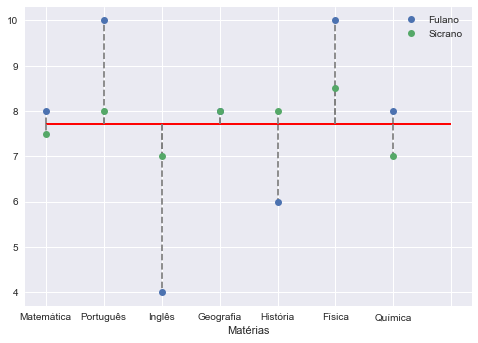

In [6]:
# Apesar de Fulano e Sicrano possuirem as mesmas métricas
# de tendência central, seus dados possuem dispersões diferentes

# Comparando a dispersão dos dados entre Fulano e Sicrano
for aluno in ["Fulano", "Sicrano"]:
    media = df_boletins[aluno].mean()
    total_disciplinas = df_boletins.shape[0]
    
    ax = df_boletins[aluno].plot(style="o", label=aluno)
    ax.hlines(y=media, 
              xmin=0, 
              xmax=total_disciplinas, 
              colors="red")

    for i in range(total_disciplinas):
        ax.vlines(x=i, 
                  ymin=media, 
                  ymax=df_boletins[aluno][i],
                  colors="gray",
                  linestyles="dashed")
    
    ax.legend()

In [30]:
# Desvio Médio Absoluto dos alunos utilizando Pandas
df_boletins.mad()

Fulano      1.551020
Beltrano    4.265306
Sicrano     0.469388
dtype: float64

In [38]:
# Criando uma função desvio médio absoluto
def desvio_medio_absoluto(conjunto: list) -> float:
    """Cálcula o desvio médio absoluto de um conjunto de dados"""
    n = len(conjunto)
    media = sum(conjunto)/n
    
    return sum([abs(x - media) for x in conjunto])/n

In [40]:
# Desvio Médio Absoluto de Fulano
notas = [8, 10, 4, 8, 6, 10, 8]
dma = desvio_medio_absoluto(notas)

print("Desvio Médio Absoluto de Fulano: {}".format(dma))

Desvio Médio Absoluto de Fulano: 1.5510204081632648
